In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns

In [2]:
df_sra = pd.read_csv('../data_tables/sraIDfull.csv', error_bad_lines=False, low_memory=False,quoting=3)

df_sra

,Run,Experiment,SRAStudy,BioProject,ProjectID,CenterName,Submission,Sample
0,ERR3550121,ERX3556726,ERP000767,PRJEB2600,204335,UOC-CCG,ERA2143351,ERS3773255
1,ERR3550142,ERX3556747,ERP000767,PRJEB2600,204335,UOC-CCG,ERA2143351,ERS3773255
2,ERR3550147,ERX3556752,ERP000767,PRJEB2600,204335,UOC-CCG,ERA2143351,ERS3773263
3,ERR3550125,ERX3556730,ERP000767,PRJEB2600,204335,UOC-CCG,ERA2143351,ERS3773263
4,ERR3550137,ERX3556742,ERP000767,PRJEB2600,204335,UOC-CCG,ERA2143351,ERS3773252
...,...,...,...,...,...,...,...,...
7676058,SRR049674,SRX020916,SRP002493,NaN,0,NIAID-RML-RTS,SRA017695,SRS073299
7676059,SRR049675,SRX021028,SRP002493,NaN,0,NIAID-RML-RTS,SRA017695,SRS073299
7676060,SRR049677,SRX021029,SRP002493,NaN,0,NIAID-RML-RTS,SRA017695,SRS073299
7676061,SRR042496,SRX020084,SRP002064,PRJNA46359,46359,SAN,DIEGO,SRS011854


In [3]:
df_sample=df_sra.groupby(by='SRAStudy', as_index=False).agg({'Sample': pd.Series.nunique}) #count unique sample IDs in SRAStudy
df_sample

,SRAStudy,Sample
0,0,18
1,0.0,36
2,100,1
3,300,1
4,317.0,1
...,...,...
198247,SRP223265,53
198248,SRP223270,112
198249,SYNTHETIC,1
198250,Sequel,1


In [4]:
df_sample.columns = ['SRAStudy', 'Number of sample']
df_sample

,SRAStudy,Number of sample
0,0,18
1,0.0,36
2,100,1
3,300,1
4,317.0,1
...,...,...
198247,SRP223265,53
198248,SRP223270,112
198249,SYNTHETIC,1
198250,Sequel,1


In [5]:
df = pd.read_csv('../data_tables/SRAStudy_count.csv', error_bad_lines=False, low_memory=False,quoting=3)
df

,Unnamed: 0,SRAStudy,Count
0,0,0,4
1,1,0.0,7
2,2,100,2
3,3,454,12
4,4,AB,2
...,...,...,...
20054,20054,SRP200173,6
20055,20055,SRP201254,1
20056,20056,SRP201956,1
20057,20057,SRP212328,1


In [6]:
df = df.drop(df.columns[0], axis=1) 
df

,SRAStudy,Count
0,0,4
1,0.0,7
2,100,2
3,454,12
4,AB,2
...,...,...
20054,SRP200173,6
20055,SRP201254,1
20056,SRP201956,1
20057,SRP212328,1


In [7]:
#df.loc[df['count'].idxmax()]

In [8]:
df_combined=pd.merge(df, df_sample, on="SRAStudy")
df_combined

,SRAStudy,Count,Number of sample
0,0,4,18
1,0.0,7,36
2,100,2,1
3,454,12,37
4,AB,2,16
...,...,...,...
20054,SRP200173,6,6
20055,SRP201254,1,2
20056,SRP201956,1,1
20057,SRP212328,1,1


In [9]:
def f_reuse(df):
    if df['Count']==1:
        val='primary'
    else: 
        val='secondary'
    return val

In [10]:
def f_reuse2(df):
    if df['Count']==1:
        val2='primary'
    elif df['Count']>=2 and df['Count']<=10: 
        val2='secondary_2_10'
    elif df['Count']>=11 and df['Count']<=50: 
        val2='secondary_11_50'
    else:
        val2='secondary_above50'
    return val2

In [11]:
df_combined['type']=df_combined.apply(f_reuse,axis=1)
df_combined['type2']=df_combined.apply(f_reuse2,axis=1)

df_combined.head()

,SRAStudy,Count,Number of sample,type,type2
0,0,4,18,secondary,secondary_2_10
1,0.0,7,36,secondary,secondary_2_10
2,100,2,1,secondary,secondary_2_10
3,454,12,37,secondary,secondary_11_50
4,AB,2,16,secondary,secondary_2_10


<Figure size 2880x1800 with 0 Axes>

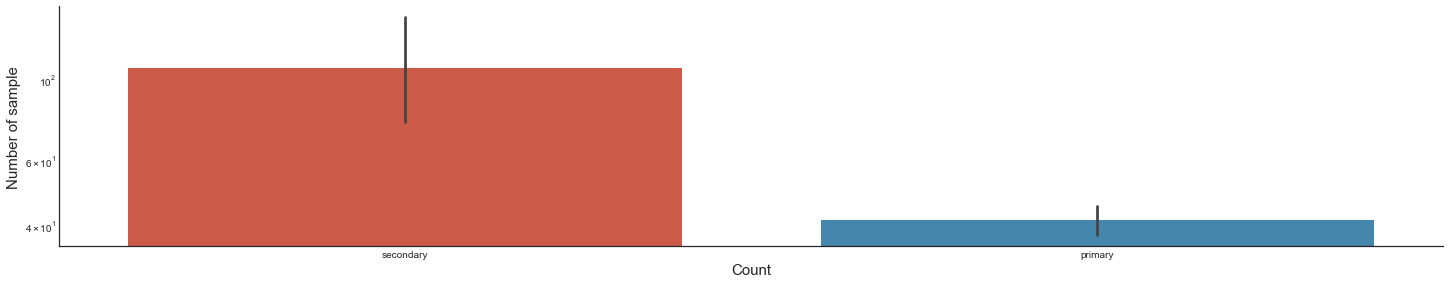

In [12]:
# set aesthetics
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))

# generate axes
ax = sns.catplot(x='type', y='Number of sample', data=df_combined,
            height=4,aspect=5,kind='bar')
sns.despine()
#plt.ylim(0, 50)

# set axis labels
ax.axes[0,0].set_xlabel('Count', fontsize = 15)
ax.axes[0,0].set_ylabel('Number of sample', fontsize = 15)
plt.yscale('log')

#save to .png
#ax.savefig('distplot.png', dpi = 200, bbox_inches = 'tight', transparent = False)

<Figure size 2880x1800 with 0 Axes>

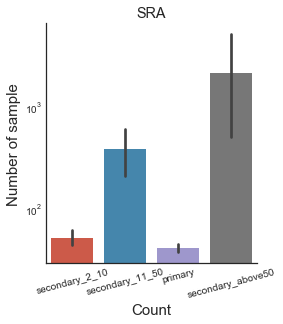

In [13]:
# set aesthetics
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))

# generate axes
ax = sns.catplot(x='type2', y='Number of sample', data=df_combined,
            height=4,aspect=1,kind='bar')
sns.despine()
#plt.ylim(0, 50)

# set axis labels
ax.axes[0,0].set_title("SRA")
ax.axes[0,0].set_xlabel('Count', fontsize = 15)
ax.axes[0,0].set_ylabel('Number of sample', fontsize = 15)
plt.yscale('log')
plt.xticks(rotation=15)

#save to .png
ax.savefig('SRA_sample_size.png', dpi = 200, bbox_inches = 'tight', transparent = False)

In [14]:
from scipy.stats import ttest_ind

cat1 = df_combined[df_combined['type2']=='primary']
cat2 = df_combined[df_combined['type2']=='secondary_above50']


ttest_ind(cat1['Number of sample'], cat2['Number of sample'])

Ttest_indResult(statistic=-21.641847675849487, pvalue=4.603431751042932e-102)

<Figure size 2880x1800 with 0 Axes>

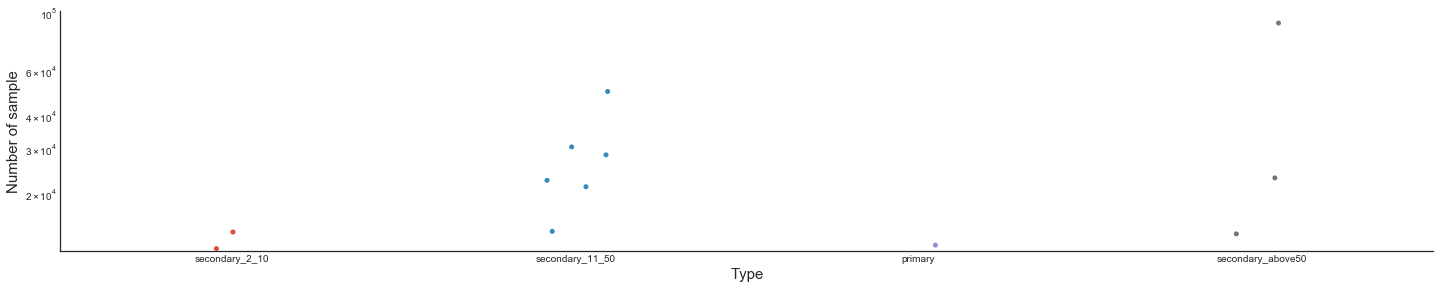

In [15]:
# set aesthetics
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))

# generate axes
ax = sns.catplot(x='type2', y='Number of sample', data=df_combined,
            height=4,aspect=5)
sns.despine()
#plt.ylim(0, 50)

# set axis labels
ax.axes[0,0].set_xlabel('Type', fontsize = 15)
ax.axes[0,0].set_ylabel('Number of sample', fontsize = 15)
plt.yscale('log')

# save to .png
#ax.savefig('SRA_sample_size.png', dpi = 200, bbox_inches = 'tight', transparent = False)